In [39]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
#from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_samples, silhouette_score


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import KElbowVisualizer

import warnings

%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
dataset_path = "..//datos//"
abnb_users_curated = "modified_train_users.csv"

In [41]:
users_df = pd.read_csv( dataset_path + abnb_users_curated )

In [42]:
# Print the number of records and the total number of movies
print('The dataset contains: ', len(users_df),' users.')

The dataset contains:  121070  users.


In [43]:
users_df.head()

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,total_seconds,average_seconds,total_sessions,number_of_devices,has_booked
0,1,820tgsjxq7,1306281600,1243100889,-9223372037,1,38.0,1,0,5,...,6,2,3,7,0,0.0,0.0,1,1,False
1,2,4ft3gnwmtx,1285632000,1244589167,1280707200,0,56.0,0,3,5,...,6,2,6,14,1,0.0,0.0,1,1,True
2,3,bjjt8pjhuk,1323043200,1256968889,1347062400,0,42.0,1,0,5,...,6,2,3,13,2,0.0,0.0,1,1,True
3,4,87mebub9p4,1284422400,1260252665,1266451200,2,41.0,0,0,5,...,6,2,3,7,1,0.0,0.0,1,1,True
4,6,lsw9q7uk0j,1262390400,1262395558,1262649600,0,46.0,0,0,5,...,6,2,3,30,1,0.0,0.0,1,1,True


In [44]:
users_df['first_device_type'].unique()


array([3, 6, 8, 2, 1, 4, 7, 0, 5], dtype=int64)

In [45]:
users_df['age'] = users_df['age'].astype(int)


In [46]:
users_has_booked_df = users_df[ users_df['has_booked'] == True]

users_to_cluster_df = users_has_booked_df[ ['age','gender', 'first_device_type', 'country_destination']]

## TO SPEED UP...
users_to_cluster_df = users_to_cluster_df.sample(1000)

print( "Number of records: ", len(users_to_cluster_df))

users_to_cluster_df.head()

Number of records:  1000


,age,gender,first_device_type,country_destination
79221,39,0,6,1
20595,78,0,6,1
82354,44,0,6,1
80445,30,1,3,1
25193,53,0,3,1


In [47]:
# let us try to normalize the dataset

#users_to_cluster_norm_df = ((users_to_cluster_df-users_to_cluster_df.min())/(users_to_cluster_df.max()-users_to_cluster_df.min()))*2
#users_to_cluster_norm_df.sample(10)

In [48]:
# Let's turn our dataset into a list
users_to_cluster = users_to_cluster_df.values

In [49]:
def add_cluster_to_dataset( original_df, predictions):
    return  pd.concat([original_df.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

# Clustering

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a __measure of how close each point in one cluster is to points in the neighboring clusters__ and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as):  
* near +1 indicate that the sample is far away from the neighboring clusters. 
* A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and   
* negative values indicate that those samples might have been assigned to the wrong cluster

## Ejecutamos K-Means para valores de k entre 2 y 5


k =  2


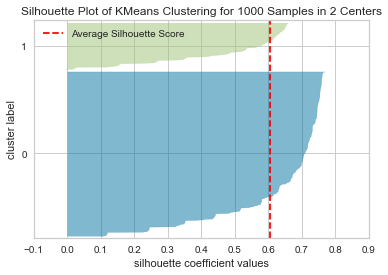

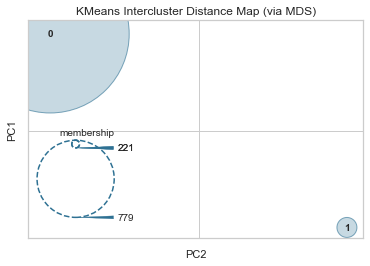


k =  3


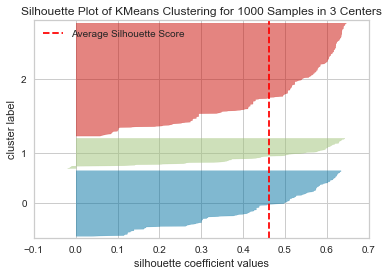

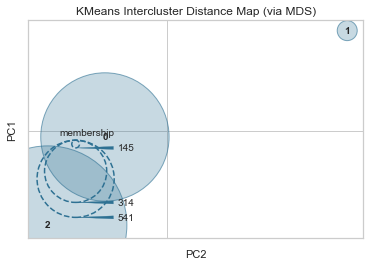


k =  4


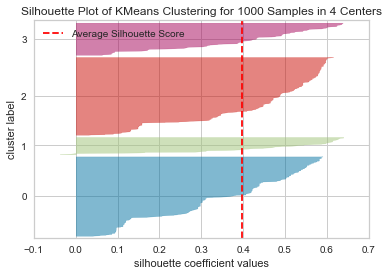

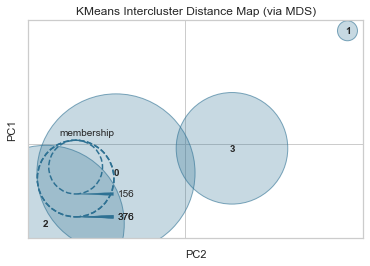


k =  5


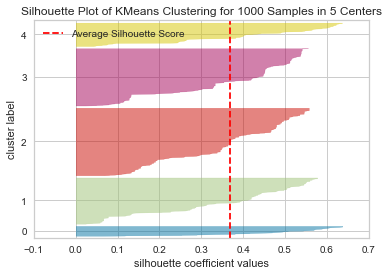

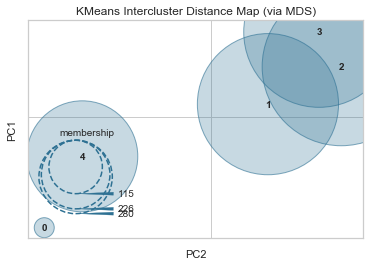

In [50]:
# Clusters to generate

k_sets = [2,3,4,5]

for k in k_sets:
    
    print("\nk = ", k)
    
    clusterer = KMeans( k, random_state=7 )
    
    predictions = clusterer.fit_predict( users_to_cluster )
 
    # print("Inertia: ", clusterer.inertia_ )
    # print("Centers: ", clusterer.cluster_centers_)

    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
    visualizer.fit(users_to_cluster)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

    # Instantiate the clustering model and visualizer
    visualizer = InterclusterDistance( clusterer )
    visualizer.fit(users_to_cluster)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

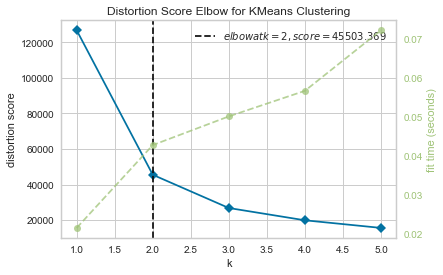

In [51]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6) )
visualizer.fit( users_to_cluster )        # Fit the data to the visualizer
visualizer.show()   

## Conclusión análisis clusterización  

Tanto del analisis del grafico de Elbox, como de las Silhoutes, se observa  
que k = 2 es la mejor opcion para clusterizar los datos

## Analisis de los clusters (para k=2)

In [52]:

clusterer = KMeans( 2, random_state=7 )
    
predictions = clusterer.fit_predict( users_to_cluster )

clustered = add_cluster_to_dataset(users_to_cluster_df, predictions)

clustered.head()


,index,age,gender,first_device_type,country_destination,group
0,79221,39,0,6,1,0
1,20595,78,0,6,1,1
2,82354,44,0,6,1,1
3,80445,30,1,3,1,0
4,25193,53,0,3,1,1


In [53]:
clustered['group'].unique()

array([0, 1], dtype=int64)

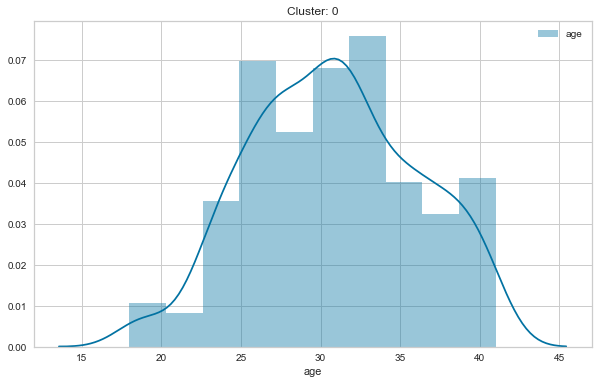

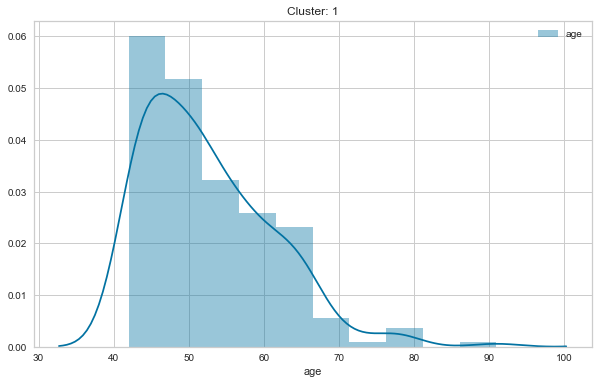

In [54]:
for cluster in range (0,2):
    
    cluster_to_show = clustered[ clustered['group'] == cluster]
    
    plt.figure(figsize=(10,6))
    sns.distplot(cluster_to_show['age'].dropna(), bins=10, label='age')
    plt.title('Cluster: ' + str(cluster) )
    plt.legend()

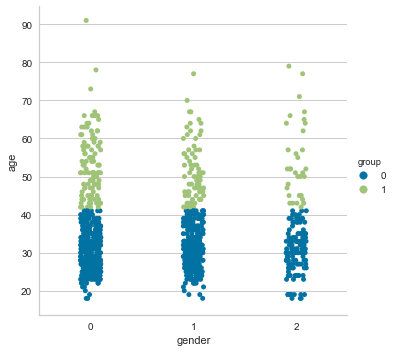

In [55]:
sns.catplot(x='gender', y='age', data=clustered , hue='group' , jitter=True )

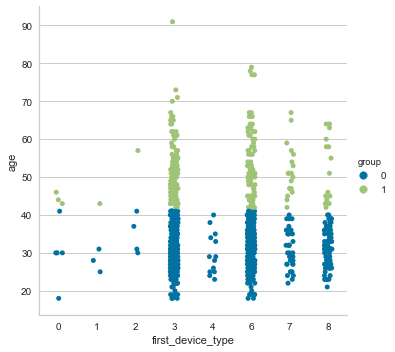

In [56]:
sns.catplot(y='age', x='first_device_type', data=clustered , hue='group' , jitter=True )

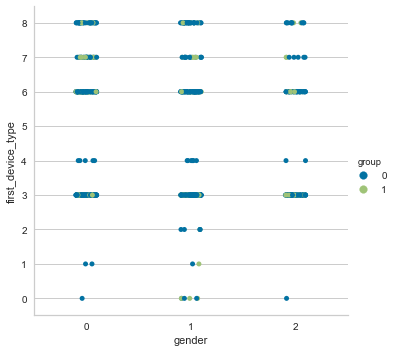

In [57]:
sns.catplot(x='gender', y='first_device_type', data=clustered , hue='group' , jitter=True )

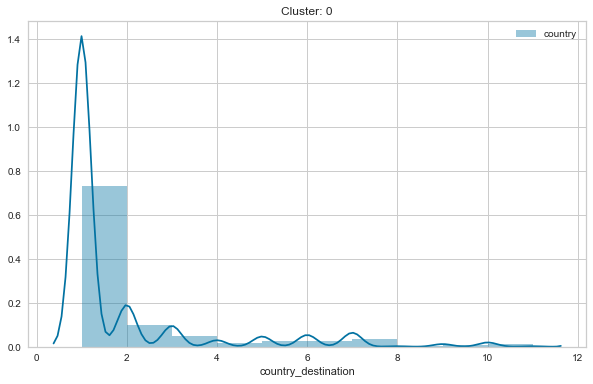

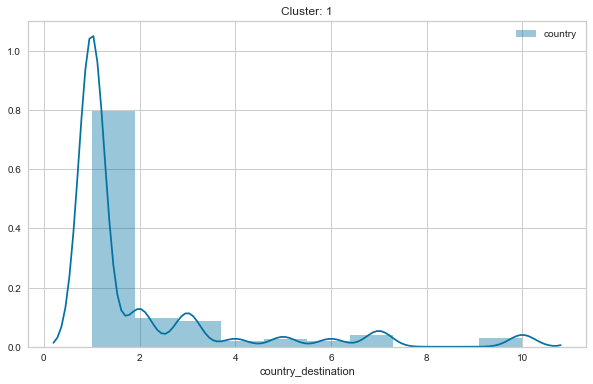

In [60]:
for cluster in range (0,2):
    
    cluster_to_show = clustered[ clustered['group'] == cluster]
    
    plt.figure(figsize=(10,6))
    sns.distplot(cluster_to_show['country_destination'].dropna(), bins=10, label='country')
    plt.title('Cluster: ' + str(cluster) )
    plt.legend()

In [63]:
clustered.groupby(['country_destination','group'])['country_destination'].count()

country_destination  group
1                    0        568
                     1        158
2                    0         78
                     1         19
3                    0         39
                     1         17
4                    0         12
                     1          4
5                    0         19
                     1          5
6                    0         22
                     1          4
7                    0         26
                     1          8
8                    0          1
9                    0          5
10                   0          8
                     1          6
11                   0          1
Name: country_destination, dtype: int64